<b>Copyright Notice</b><br>
Copyright © 2019 DigiPen (USA) Corp. and its owners.  All rights reserved.<br>
No parts of this publication may be copied or distributed, transmitted, transcribed, stored in a retrieval system, or translated into any human or computer language without the express written permission of DigiPen (USA) Corp., 9931 Willows Road NE, Redmond, WA 98052<br>
<b>Trademarks</b><br>
DigiPen® is a registered trademark of DigiPen (USA) Corp.<br>
All other product names mentioned in this booklet are trademarks or registered trademarks of their respective companies and are hereby acknowledged.

# MAT256 Project: Solving Initial Value ODE Problems

**Author:** Jonathan Ackerman<br>
**Date:** 7/8/19

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

from collections import namedtuple

In [22]:
# Euler Method Definition
def Euler(h, t, f, IV):
    n = t / h
    t_n = IV.t
    z_n = IV.z
    
    output = np.array([])
    output.resize(int(n+1), z_n.size + 1)
    
    for i in range(int(n)):
        output[i,0] = t_n
        output[i,1] = z_n.tolist()[0]
        # calc k1
        k1 = f(t_n, z_n)
        # calc y_n+1
        z_n = z_n + h * k1
        # calc t_n+1
        t_n = round(t_n + h, 5)
    output[int(n),0] = t_n
    output[int(n),1] = z_n.tolist()[0]
    return output
          

In [3]:
# Midpoint Method Definition


In [27]:
# Modified Euler Method Definition
def ModifiedEuler(h, t, f, IV):
    n = t / h
    t_n = IV.t
    z_n = IV.z
    for i in range(int(n)):
        # calc k1
        k1 = f(t_n, z_n)
        # calc k2
        k2 = f(t_n + h, z_n + h * k1)
        # calc y_n+1
        z_n = z_n + (h / 2) * (k1 + k2)
        # calc t_n+1
        t_n = round(t_n + h, 5)
    return z_n

In [28]:
# Runge-Kutta Method Definition
def RK(h, t, f, IV):
    n = t / h
    t_n = IV.t
    z_n = IV.z
    for i in range(int(n)):
        k1 = f( t_n, z_n )
        k2 = f( t_n + (h / 2), z_n + ((h * k1) / 2) )
        k3 = f( t_n + (h / 2), z_n + ((h * k2) / 2) )
        k4 = f( t_n + h, z_n + (h * k3) )
        # calc y_n+1
        z_n = z_n + (h / 6) * (k1 + (2*k2) + (2*k3) + k4)
        # calc t_n+1
        t_n = round(t_n + h, 5)
    return z_n
        

## A One-Dimensional ODE

---

\begin{align}
y' & = 1 - t + 4y \\
y(0) & = 1
\end{align}

---

In [23]:
def F1(t, z):
    z_p = 1 - t + 4 * z
    return z_p

initialValue = namedtuple('IV', ['t', 'z'])
t0 = 0
z0 = np.array([1])
IV = initialValue(t0, z0)
eq1 = F1

### 1. Euler Method

In [26]:
out = Euler(0.05, 1.0, eq1, IV)
print(out)

[[ 0.          1.        ]
 [ 0.05        1.25      ]
 [ 0.1         1.5475    ]
 [ 0.15        1.902     ]
 [ 0.2         2.3249    ]
 [ 0.25        2.82988   ]
 [ 0.3         3.433356  ]
 [ 0.35        4.1550272 ]
 [ 0.4         5.01853264]
 [ 0.45        6.05223917]
 [ 0.5         7.290187  ]
 [ 0.55        8.7732244 ]
 [ 0.6        10.55036928]
 [ 0.65       12.68044314]
 [ 0.7        15.23403177]
 [ 0.75       18.29583812]
 [ 0.8        21.96750574]
 [ 0.85       26.37100689]
 [ 0.9        31.65270827]
 [ 0.95       37.98824993]
 [ 1.         45.58839991]]


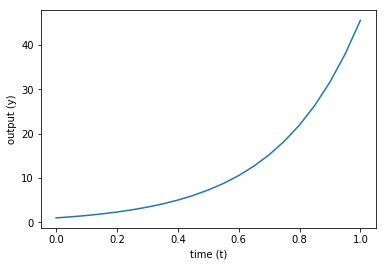

In [25]:
t = out[:,:1]
y = out[:,1:2]
plt.xlabel("time (t)")
plt.ylabel("output (y)")
plt.plot(t, y)
plt.show()

### 2. Midpoint Method

### 3. Modified Euler Method

In [29]:
ModifiedEuler(0.05, 1.0, eq1, IV)

array([63.42469764])

### 4. Runge-Kutta Method

In [30]:
RK(0.05, 1.0, eq1, IV)

array([64.89487502])

## A System of ODEs

---

\begin{align}
x' & = t - x + y \\
y' & = x + y \\
\\
x(0) & = 0 \\
y(0) & = 1
\end{align}

---

In [31]:
def F2(t, z):
    k = np.array([0, 0])
    k[0] = t - z[0] + z[1]
    k[1] = z[0] + z[1]
    return k

initialValue = namedtuple('IV', ['t', 'z'])
t0 = 0
z0 = np.array([0, 1])
IV = initialValue(t0, z0)
eq2 = F2

### 1. Euler Method

In [32]:
Euler(0.05, 1.0, eq2, IV)

array([[0.  , 0.  , 0.  ],
       [0.05, 0.05, 0.  ],
       [0.1 , 0.1 , 0.  ],
       [0.15, 0.15, 0.  ],
       [0.2 , 0.2 , 0.  ],
       [0.25, 0.25, 0.  ],
       [0.3 , 0.3 , 0.  ],
       [0.35, 0.35, 0.  ],
       [0.4 , 0.4 , 0.  ],
       [0.45, 0.45, 0.  ],
       [0.5 , 0.5 , 0.  ],
       [0.55, 0.55, 0.  ],
       [0.6 , 0.6 , 0.  ],
       [0.65, 0.65, 0.  ],
       [0.7 , 0.7 , 0.  ],
       [0.75, 0.75, 0.  ],
       [0.8 , 0.85, 0.  ],
       [0.85, 0.95, 0.  ],
       [0.9 , 1.05, 0.  ],
       [0.95, 1.15, 0.  ],
       [1.  , 1.25, 0.  ]])

### 2. Midpoint Method

### 3. Modified Euler Method

In [33]:
ModifiedEuler(0.05, 1.0, eq2, IV)

array([1.275, 2.775])

### 4. Runge-Kutta Method

In [34]:
RK(0.05, 1.0, eq2, IV)

array([1.25833333, 2.7       ])

## A Second Order ODE

---

\begin{align}
2y'' + 5y' - 3y & = 0 \\
\\
y(0) & = 5 \\
y'(0) & = 13
\end{align}

---

In [35]:
def F3(t, z):
    k = np.array([0, 0])
    k[0] = z[1]
    k[1] = 0.5 * (3 * z[0] - 5 * z[1])
    return k

initialValue = namedtuple('IV', ['t', 'z'])
t0 = 0
z0 = np.array([5, 13])
IV = initialValue(t0, z0)
eq3 = F3

### 1. Euler Method

In [36]:
Euler(0.05, 1.0, eq3, IV)

array([[ 0.  ,  5.  ,  0.  ],
       [ 0.05,  5.65,  0.  ],
       [ 0.1 ,  6.2 ,  0.  ],
       [ 0.15,  6.7 ,  0.  ],
       [ 0.2 ,  7.15,  0.  ],
       [ 0.25,  7.6 ,  0.  ],
       [ 0.3 ,  8.  ,  0.  ],
       [ 0.35,  8.4 ,  0.  ],
       [ 0.4 ,  8.75,  0.  ],
       [ 0.45,  9.1 ,  0.  ],
       [ 0.5 ,  9.45,  0.  ],
       [ 0.55,  9.75,  0.  ],
       [ 0.6 , 10.05,  0.  ],
       [ 0.65, 10.35,  0.  ],
       [ 0.7 , 10.65,  0.  ],
       [ 0.75, 10.95,  0.  ],
       [ 0.8 , 11.25,  0.  ],
       [ 0.85, 11.55,  0.  ],
       [ 0.9 , 11.85,  0.  ],
       [ 0.95, 12.15,  0.  ],
       [ 1.  , 12.45,  0.  ]])

### 2. Midpoint Method

### 3. Modified Euler Method

In [37]:
ModifiedEuler(0.05, 1.0, eq3, IV)

array([12.45 ,  6.875])

### 4. Runge-Kutta Method

In [38]:
RK(0.05, 1.0, eq3, IV)

array([12.45833333,  6.89166667])